<a href="https://colab.research.google.com/github/crys-ss/atividade_1/blob/master/T8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapas envolvidas na implementação do LSA


*   Gere uma matriz de termo de documento

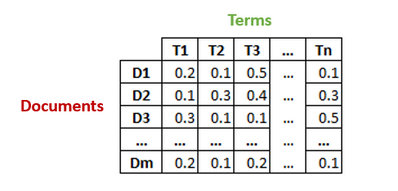
*   Em seguida, reduzir as dimensões da matriz 
*   Decompor a matriz em três outras matrizes. Suponha que queremos decompor uma matriz A usando SVD. Ele será decomposto em matriz U, matriz S e VT  (transposição da matriz V).

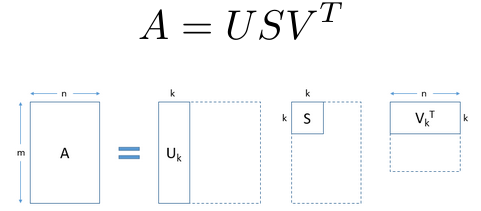




Implementação do LSA em Python

[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]]


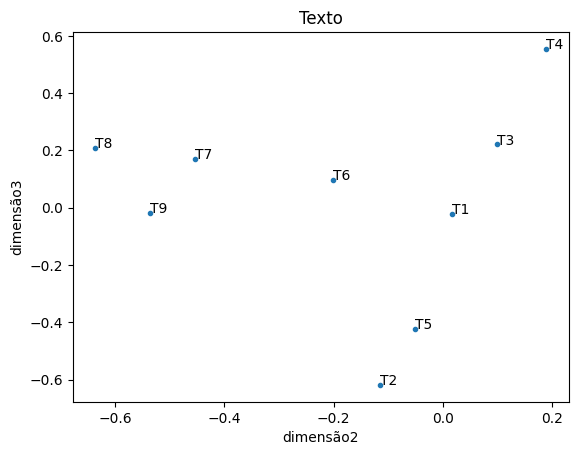

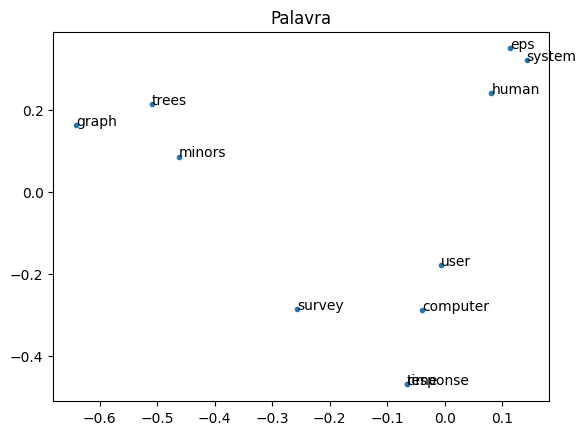

In [5]:
'''1- Raw text data
2- Document term matrix
3-Singular value decomposition
4-Topic-encoded data'''

#importa as bibliotecas do python para a contrução do código
import matplotlib.pyplot as plt
from snownlp import SnowNLP
import matplotlib.pyplot as plt
from numpy import zeros
import numpy as np
from scipy.linalg import svd

deerwester = [

    "Human machine interjuce for Lab ABC computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user-perceived response time to error measurement",
    "The generation of random, binary, unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV: Widths of trees and well-quasi-ordering",
    "Graph minors: A survey"

]
stopwords = ['for', 'of', 'a', 'the', 'and', 'to', 'in']
ignorechars = ''',:'!?：.！'''

for i in ignorechars:
    for a in range(len(deerwester)):
        deerwester[a] = deerwester[a].replace(i, '')


class LSA(object):
    def __init__(self, stopwords, ignorechars):
        self.stopwords = stopwords
        self.ignorechars = ignorechars
        self.wdict = {}
        self.dcount = 0

    def parse(self, doc):

        s = SnowNLP(doc)
        words = s.words
        for w in words:
            # print self.dcount
            w = w.lower()
            if w in self.stopwords:  
                continue
            elif w in self.wdict:
                self.wdict[w].append(self.dcount)
            else:
                self.wdict[w] = [self.dcount]
        self.dcount += 1

    def build(self):
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1]
        self.keys.sort()  
        self.A = zeros([len(self.keys), self.dcount])
        for i, k in enumerate(self.keys):
            for d in self.wdict[k]:
                self.A[i, d] += 1

    def printA(self):
        print(self.A)

        # decomposição SVD
        # u indica a frequência
        # s correlação entre palavras e categorias
        #  vt -  classe
        u, s, vt = svd(self.A)

        plt.title("Texto")
        plt.xlabel(u'dimensão2')
        plt.ylabel(u'dimensão3')

        titles = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
        vdemention2 = vt[1]
        vdemention3 = vt[2]

        # Observe o texto ao lado de cada ponto
        for j in range(len(vdemention2)):
            plt.text(vdemention2[j], vdemention3[j], titles[j])
        plt.plot(vdemention2, vdemention3, '.')
        plt.show()

        plt.title(u"Palavra")
        ut = u.T
        demention2 = ut[1]
        demention3 = ut[2]
        for i in range(len(demention2)):
            plt.text(demention2[i], demention3[i], self.keys[i])
        plt.plot(demention2, demention3, '.')
        plt.show()


mylsa = LSA(stopwords, ignorechars)
for t in deerwester:
    mylsa.parse(t)
mylsa.build()
mylsa.printA()